# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv('laptop_price.csv',encoding='latin1')

The file was not read by utf-8. Then 'latin1' was used for encoding.

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


The dataset consists of several features related with computers. Let's explore the dataset!

In [4]:
df.count()

laptop_ID           1303
Company             1303
Product             1303
TypeName            1303
Inches              1303
ScreenResolution    1303
Cpu                 1303
Ram                 1303
Memory              1303
Gpu                 1303
OpSys               1303
Weight              1303
Price_euros         1303
dtype: int64

There is no missing value, great! Thus, there is no need to fill or drop data.

In [5]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

There is no problem to use continues features because they can be used directly as inputs after standardization. However we need to work on catagorical features carefuly. It seems very hard to work on product name because there are 618 unique product name which is too many for our dataset. Let's drop it.

In [6]:
df.drop('Product',axis =1,inplace=True)

Also, we cannot use Laptop ID as feature because every ID is distinct. From now on, we will use them as index.

In [7]:
df.set_index('laptop_ID',inplace = True)

In [8]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
laptop_ID,,,,,,,,,,,
1,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
3,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
4,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
5,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


Company name, type name and OpSys can be used as dummy variable but we should turn Ram, Weight, Memory and ScreenResolution to numerical value because they carry important numerical informations for our model while they are currently seen as catagories. So, we will preprocess them one by one. How about starting with the easiest one: 'weight'.

In [9]:
weight = df["Weight"].iloc[0]
weight[:-2]

'1.37'

As you see, weight info can be captured easily by simple slicing operation. However, its type is still string. Therefore, the result should be type casted to float.

In [10]:
float(weight[:-2])

1.37

We managed to convert a single weight info to continuous value. Now, it is time to turn this operation to function in order to apply it to whole column of the dataframe.

In [11]:
def weight_extraction(name):
    return float(name[:-2])

In [12]:
df["Weight"] = df["Weight"].apply(weight_extraction)

In [13]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
laptop_ID,,,,,,,,,,,
1,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
3,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
4,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
5,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


Yeeyyy it works! We do not need 'kg' unit anymore because all the data is in same unit.

Now it is time to move on 'Ram'. It is similar to weight column. So, let's directly dive into the function.

In [14]:
def ram_extraction(name):
    return int(name[:-2])

In [15]:
df["Ram"] = df["Ram"].apply(ram_extraction)

In [16]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
laptop_ID,,,,,,,,,,,
1,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
3,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
4,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
5,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


We got rid of GB in Ram also and we use the Ram category directly as continuous value.

In [17]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

There are 118 type of processor here. It is very hard to get sensible ML model with all these processor models. So, we will only get the clock speed from 'Cpu' feature. It is seen that in every row, the clock speed is located at the end in the feature. Hence, we can extract it by splitting the data to its parts and we can store the last part.

In [18]:
clock = df['Cpu'].iloc[15]
speed = clock.split()[-1]
speed

'2.3GHz'

Great but we do not want any string in the result. So, our function should only get the numbers. By running a for loop, we can store the clock speed value if the iteration stops before a 'G' of 'GHz' appear.

In [19]:
value = ''
for character in speed:
    if character == 'G':
        break
    else:
        value+=character
print(float(value))

2.3


It works great! Let's turn this into function again.

In [20]:
def cpu_clockspeed(name):
    speed = name.split()[-1]
    value = ''
    for character in speed:
        if character == 'G':
            break
        else:
            value+=character
            
    return float(value)

In [21]:
df['ClockSpeed'] = df['Cpu'].apply(cpu_clockspeed)

In [22]:
df['ClockSpeed'].value_counts()

2.50    293
2.70    166
2.80    165
1.60    134
2.30     86
2.00     86
1.80     78
2.60     76
1.10     53
2.40     52
2.90     21
3.00     19
1.20     15
1.44     12
2.20     11
1.50     10
1.30      6
3.60      5
0.90      4
3.10      3
2.10      3
1.90      2
3.20      1
1.00      1
1.92      1
Name: ClockSpeed, dtype: int64

In [23]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,ClockSpeed
laptop_ID,,,,,,,,,,,,
1,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2.3
2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1.8
3,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,2.5
4,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2.7
5,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,3.1


We successed to get the clockspeed information from 'Cpu' feature. So, we do not need 'Cpu' catagory anymore.

In [24]:
df.drop('Cpu',axis =1,inplace =True)

In [25]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price_euros,ClockSpeed
laptop_ID,,,,,,,,,,,
1,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2.3
2,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1.8
3,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,2.5
4,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2.7
5,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,3.1


In [26]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

There are many type of screen info. It is very hard to differantiate them. However, it is possible to get the resolution value info from this feature. If you examine them carefuly, it can be seen that the resolution part is the last portion in all rows. So, we can split this feature to its parts and get the pixel values.

In [27]:
resolution = df['ScreenResolution'].iloc[40]
quality = resolution.split()[-1]
quality

'1920x1080'

Now, we managed to get the resolution info. To process it in our model, ww need to seperate it to width and height pixel values.

In [28]:
def width(screen):

    quality = screen.split()[-1]
    result = int(quality.split('x')[0])
            
    return result

In [29]:
def height(screen):

    quality = screen.split()[-1]
    result = int(quality.split('x')[1])
            
    return result

In [30]:
df['Width'] = df['ScreenResolution'].apply(width)

In [31]:
df['Height'] = df['ScreenResolution'].apply(height)

Image quality is a product of width and height pixel values.

In [32]:
df['Pixel'] = df['Width'] * df['Height']

In [33]:
df['Pixel'].value_counts()

2073600    841
1049088    308
8294400     43
5760000     27
3686400     23
1440000     23
4096000      6
3317760      6
3393024      6
2304000      5
1296000      4
5184000      4
3840000      4
3110400      2
4990464      1
Name: Pixel, dtype: int64

The higher the pixel value, the better theimage quality. We got the pixel value of the display so we can drop ScreenResolution feature.

In [34]:
df.drop('ScreenResolution',axis =1,inplace =True)

In [35]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,ClockSpeed,Width,Height,Pixel
laptop_ID,,,,,,,,,,,,,
1,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2.3,2560,1600,4096000
2,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1.8,1440,900,1296000
3,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,2.5,1920,1080,2073600
4,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2.7,2880,1800,5184000
5,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,3.1,2560,1600,4096000


Let's check the correlation between features and price.

In [36]:
df.corr()['Price_euros'].sort_values(ascending=False)

Price_euros    1.000000
Ram            0.743007
Width          0.556529
Height         0.552809
Pixel          0.515486
ClockSpeed     0.430293
Weight         0.210370
Inches         0.068197
Name: Price_euros, dtype: float64

Only inch value has little effect on price, lets try to add another parameter.

In [37]:
df['PPI'] = ((df['Width'])**2 + (df['Height'])**2)**0.5/df['Inches']
df['PPI'] = round(df['PPI'],2)

PPI stands for Pixel per Inches. It shows the density of pixels in a screen. The formula is below:
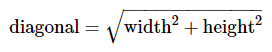 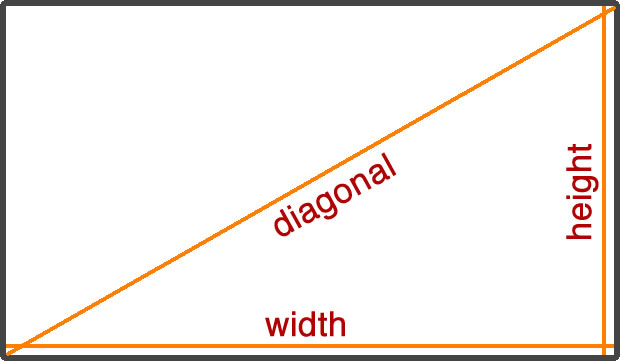 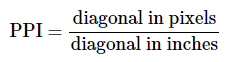

In [38]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,ClockSpeed,Width,Height,Pixel,PPI
laptop_ID,,,,,,,,,,,,,,
1,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2.3,2560,1600,4096000,226.98
2,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1.8,1440,900,1296000,127.68
3,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,2.5,1920,1080,2073600,141.21
4,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2.7,2880,1800,5184000,220.53
5,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,3.1,2560,1600,4096000,226.98


In [39]:
df.corr()['Price_euros'].sort_values(ascending=False)

Price_euros    1.000000
Ram            0.743007
Width          0.556529
Height         0.552809
Pixel          0.515486
PPI            0.473506
ClockSpeed     0.430293
Weight         0.210370
Inches         0.068197
Name: Price_euros, dtype: float64

So, the PPI value is also an important feature for us. The 'Pixel' and 'PPI' features contain already enough information for us. For this reason, we can drop 'Width' and 'Height'.

In [40]:
df.drop(['Width','Height'],axis = 1, inplace=True)

Now we can work on Memory and GPU, then we can move on to transforming every catagoric feature to OHE.

In [41]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

There are many GPU models as well but at least we can extract GPU Brand for comparison. It is possible that some brands more expensive than others.

In [42]:
def gpu_brand(name):
    brand = name.split()[0]
            
    return brand

In [43]:
df['GPU_Brand'] = df['Gpu'].apply(gpu_brand)

In [44]:
df['GPU_Brand'].unique()

array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object)

We extracted the brands from GPU. Thus, the Gpu feature is no longer necessary for us.

In [45]:
df.drop('Gpu',axis = 1, inplace=True)
df.head()

,Company,TypeName,Inches,Ram,Memory,OpSys,Weight,Price_euros,ClockSpeed,Pixel,PPI,GPU_Brand
laptop_ID,,,,,,,,,,,,
1,Apple,Ultrabook,13.3,8,128GB SSD,macOS,1.37,1339.69,2.3,4096000,226.98,Intel
2,Apple,Ultrabook,13.3,8,128GB Flash Storage,macOS,1.34,898.94,1.8,1296000,127.68,Intel
3,HP,Notebook,15.6,8,256GB SSD,No OS,1.86,575.00,2.5,2073600,141.21,Intel
4,Apple,Ultrabook,15.4,16,512GB SSD,macOS,1.83,2537.45,2.7,5184000,220.53,AMD
5,Apple,Ultrabook,13.3,8,256GB SSD,macOS,1.37,1803.60,3.1,4096000,226.98,Intel


Now, it is time to work on 'Memory'. For device memory, both the capacity and the speed of the storage are important.

In [46]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

There are many type of memory we must work on here. We can extract the amount of the storage by extracting the values from the feature. The speed of the storage cannot be found from this dataset however we can identify the technologies.

In [47]:
re.findall(r'\d+', "256GB SSD +  2TB HDD")

['256', '2']

This built-in function can detect positive numbers. However, we should be careful about GB and TB. 1 TB equals to 1024 GB.

In [48]:
def storage(name):
    storage = name.split()
    amount = 0
    
    for element in storage:
        if 'GB' in element:
            amount += int(element[:-2])
        elif 'TB' in element:
            amount += float(element[:-2])*1024
            
    return int(amount)

Let's try our function with some examples.

In [49]:
storage('256GB SSD +  256GB SSD')

512

In [50]:
storage('1.0TB HDD +  1TB HDD')

2048

It works well. For next step, we need to detect the storage tech. There are 3 storage type in our feature. They are HDD, SSD and Flash Storage. It is commonly known that SSDs and Flash are usually faster than HDD. They can be used alone or can be used collectively which is called 'Hybrid' in computer world. Hybrids are usually cheaper than pure SSD storage while faster and more expesive than pure HDD storage. 

In [51]:
def storage_type(name):
    storage = name.split()
    tech = []
    
    for element in storage:
        if element=='SSD' or element=='HDD' or element=='Flash':
            tech.append(element)
        elif element=='Hybrid':
            tech.append(element)
    
    if len(tech) > 1:
        return 'Hybrid'
    else:
        return tech[0]

Let's try this function with some examples as well.

In [52]:
storage_type('512GB SSD +  1.0TB Hybrid')

'Hybrid'

In [53]:
storage_type('64GB Flash Storage +  1TB HDD')

'Hybrid'

In [54]:
storage_type('240GB SSD')

'SSD'

It is time to apply functions to dataset.

In [55]:
df['Total_Storage'] = df['Memory'].apply(storage)
df['Storage_Type'] = df['Memory'].apply(storage_type)

In [56]:
df.drop('Memory',axis = 1, inplace=True)
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,ClockSpeed,Pixel,PPI,GPU_Brand,Total_Storage,Storage_Type
laptop_ID,,,,,,,,,,,,,
1,Apple,Ultrabook,13.3,8,macOS,1.37,1339.69,2.3,4096000,226.98,Intel,128,SSD
2,Apple,Ultrabook,13.3,8,macOS,1.34,898.94,1.8,1296000,127.68,Intel,128,Flash
3,HP,Notebook,15.6,8,No OS,1.86,575.00,2.5,2073600,141.21,Intel,256,SSD
4,Apple,Ultrabook,15.4,16,macOS,1.83,2537.45,2.7,5184000,220.53,AMD,512,SSD
5,Apple,Ultrabook,13.3,8,macOS,1.37,1803.60,3.1,4096000,226.98,Intel,256,SSD


In [57]:
df.corr()['Price_euros'].sort_values(ascending=False)

Price_euros      1.000000
Ram              0.743007
Pixel            0.515486
PPI              0.473506
ClockSpeed       0.430293
Weight           0.210370
Total_Storage    0.157830
Inches           0.068197
Name: Price_euros, dtype: float64

Total_Storage has a slight influance on price but i am pretty sure that when combined with the Storage_Type, they hold valuable information for price.

In [58]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [59]:
df['TypeName'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

We are pretty close to finish preprocessing. Let's turn categorical features to dummy variables.

In [60]:
df = df.join(pd.get_dummies(df.Company)).drop(['Company'],axis = 1)
df = df.join(pd.get_dummies(df.TypeName)).drop(['TypeName'],axis = 1)
df = df.join(pd.get_dummies(df.OpSys)).drop(['OpSys'],axis = 1)
df = df.join(pd.get_dummies(df.Storage_Type)).drop(['Storage_Type'],axis = 1)
df = df.join(pd.get_dummies(df.GPU_Brand)).drop(['GPU_Brand'],axis = 1)

In [61]:
df.head()

,Inches,Ram,Weight,Price_euros,ClockSpeed,Pixel,PPI,Total_Storage,Acer,Apple,...,Windows 7,macOS,Flash,HDD,Hybrid,SSD,AMD,ARM,Intel,Nvidia
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,13.3,8,1.37,1339.69,2.3,4096000,226.98,128,0,1,...,0,1,0,0,0,1,0,0,1,0
2,13.3,8,1.34,898.94,1.8,1296000,127.68,128,0,1,...,0,1,1,0,0,0,0,0,1,0
3,15.6,8,1.86,575.00,2.5,2073600,141.21,256,0,0,...,0,0,0,0,0,1,0,0,1,0
4,15.4,16,1.83,2537.45,2.7,5184000,220.53,512,0,1,...,0,1,0,0,0,1,1,0,0,0
5,13.3,8,1.37,1803.60,3.1,4096000,226.98,256,0,1,...,0,1,0,0,0,1,0,0,1,0


In [62]:
len(df.columns)

50

50 columns? Phew! It is better to filter some to get a generalized model.

In [63]:
df.corr()['Price_euros'].sort_values(ascending=False)

Price_euros           1.000000
Ram                   0.743007
Pixel                 0.515486
PPI                   0.473506
ClockSpeed            0.430293
Gaming                0.375789
Nvidia                0.348797
Hybrid                0.294630
SSD                   0.264977
Ultrabook             0.255658
Workstation           0.249752
Razer                 0.233756
Weight                0.210370
MSI                   0.180100
Total_Storage         0.157830
Windows 7             0.152381
Windows 10            0.137048
macOS                 0.089928
Apple                 0.080688
2 in 1 Convertible    0.072675
Inches                0.068197
LG                    0.067053
Dell                  0.048509
Microsoft             0.047562
Toshiba               0.040339
Google                0.038086
Samsung               0.034584
Windows 10 S          0.018312
Huawei                0.016851
Mac OS X              0.015656
Xiaomi                0.000776
Asus                 -0.010376
ARM     

 Some features can have a negative correlation as above. Therefore, we must filter the features according to their absolute correlation.

In [64]:
correlated_features = abs(df.corr()['Price_euros']).sort_values(ascending=False)
correlated_features

Price_euros           1.000000
Ram                   0.743007
Notebook              0.549248
Pixel                 0.515486
PPI                   0.473506
ClockSpeed            0.430293
HDD                   0.425241
Gaming                0.375789
Nvidia                0.348797
Hybrid                0.294630
SSD                   0.264977
Ultrabook             0.255658
Workstation           0.249752
Razer                 0.233756
Flash                 0.216282
Weight                0.210370
Acer                  0.208349
AMD                   0.199415
Intel                 0.184205
MSI                   0.180100
No OS                 0.177094
Linux                 0.162060
Total_Storage         0.157830
Windows 7             0.152381
Windows 10            0.137048
Chrome OS             0.118684
Netbook               0.097572
macOS                 0.089928
Mediacom              0.087161
Apple                 0.080688
2 in 1 Convertible    0.072675
Vero                  0.071972
Inches  

In [65]:
selected_features = correlated_features[:26].index
selected_features

Index(['Price_euros', 'Ram', 'Notebook', 'Pixel', 'PPI', 'ClockSpeed', 'HDD',
       'Gaming', 'Nvidia', 'Hybrid', 'SSD', 'Ultrabook', 'Workstation',
       'Razer', 'Flash', 'Weight', 'Acer', 'AMD', 'Intel', 'MSI', 'No OS',
       'Linux', 'Total_Storage', 'Windows 7', 'Windows 10', 'Chrome OS'],
      dtype='object')

In [66]:
df = df[selected_features]

We filtered most important 25 features in the dataframe.

In [67]:
df

,Price_euros,Ram,Notebook,Pixel,PPI,ClockSpeed,HDD,Gaming,Nvidia,Hybrid,...,Acer,AMD,Intel,MSI,No OS,Linux,Total_Storage,Windows 7,Windows 10,Chrome OS
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,1339.69,8,0,4096000,226.98,2.3,0,0,0,0,...,0,0,1,0,0,0,128,0,0,0
2,898.94,8,0,1296000,127.68,1.8,0,0,0,0,...,0,0,1,0,0,0,128,0,0,0
3,575.00,8,1,2073600,141.21,2.5,0,0,0,0,...,0,0,1,0,1,0,256,0,0,0
4,2537.45,16,0,5184000,220.53,2.7,0,0,0,0,...,0,1,0,0,0,0,512,0,0,0
5,1803.60,8,0,4096000,226.98,3.1,0,0,0,0,...,0,0,1,0,0,0,256,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,638.00,4,0,2073600,157.35,2.5,0,0,0,0,...,0,0,1,0,0,0,128,0,1,0
1317,1499.00,16,0,5760000,276.05,2.5,0,0,0,0,...,0,0,1,0,0,0,512,0,1,0
1318,229.00,2,1,1049088,111.94,1.6,0,0,0,0,...,0,0,1,0,0,0,64,0,1,0


Now, we are done with preprocessing. It is time for separeting the dataframe to input and target vectors.

In [68]:
X = df.drop('Price_euros',axis = 1)
y = df['Price_euros']

In [69]:
X.columns

Index(['Ram', 'Notebook', 'Pixel', 'PPI', 'ClockSpeed', 'HDD', 'Gaming',
       'Nvidia', 'Hybrid', 'SSD', 'Ultrabook', 'Workstation', 'Razer', 'Flash',
       'Weight', 'Acer', 'AMD', 'Intel', 'MSI', 'No OS', 'Linux',
       'Total_Storage', 'Windows 7', 'Windows 10', 'Chrome OS'],
      dtype='object')

In [70]:
y

laptop_ID
1       1339.69
2        898.94
3        575.00
4       2537.45
5       1803.60
         ...   
1316     638.00
1317    1499.00
1318     229.00
1319     764.00
1320     369.00
Name: Price_euros, Length: 1303, dtype: float64

To reach optimum weights, scaling input variables is crucial. For scaling, standard scaler is prefered in this study. 

In [71]:
continues_features = ['Ram','Weight','ClockSpeed','Pixel','PPI','Total_Storage']

There is no need to scale dummy variables because their range is already 0 and 1.

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[continues_features] = scaler.fit_transform(X[continues_features])

In [73]:
X

,Ram,Notebook,Pixel,PPI,ClockSpeed,HDD,Gaming,Nvidia,Hybrid,SSD,...,Acer,AMD,Intel,MSI,No OS,Linux,Total_Storage,Windows 7,Windows 10,Chrome OS
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,-0.075195,0,1.385714,1.863955,0.002426,0,0,0,0,1,...,0,0,1,0,0,0,-1.026162,0,0,0
2,-0.075195,0,-0.627576,-0.439733,-0.985431,0,0,0,0,0,...,0,0,1,0,0,0,-1.026162,0,0,0
3,-0.075195,1,-0.068457,-0.125847,0.397569,0,0,0,0,1,...,0,0,1,0,1,0,-0.759244,0,0,0
4,1.498767,0,2.168021,1.714320,0.792712,0,0,0,0,1,...,0,1,0,0,0,0,-0.225410,0,0,0
5,-0.075195,0,1.385714,1.863955,1.582997,0,0,0,0,1,...,0,0,1,0,0,0,-0.759244,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,-0.862176,0,-0.068457,0.248590,0.397569,0,0,0,0,1,...,0,0,1,0,0,0,-1.026162,0,1,0
1317,1.498767,0,2.582183,3.002344,0.397569,0,0,0,0,1,...,0,0,1,0,0,0,-0.225410,0,1,0
1318,-1.255667,1,-0.805114,-0.804889,-1.380574,0,0,0,0,0,...,0,0,1,0,0,0,-1.159620,0,1,0


Our inputs are scaled now. We can split the data to train and test sets. Due to a few data we have, we will split the train and test set as 85%-15%.

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=30)

There are many catagories in our model. In these kind of situations, random forest works well because it is made of many decision trees. It can estimate the target value by votes of majority.

In [75]:
from sklearn.ensemble import RandomForestRegressor
# Fitting Random Forest Regression to the dataset
random_forest = RandomForestRegressor()
 
# Fit the regressor with x and y data
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [76]:
from sklearn.metrics import mean_squared_error, r2_score

In [77]:
# Making predictions on the testing set
forest_predictions = random_forest.predict(X_test)

# Evaluating the model on testing set
mse = mean_squared_error(y_test, forest_predictions)
rmse = mse**0.5
r2 = r2_score(y_test, forest_predictions)

print(f'Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}, Root Mean Squared Error: {rmse:.2f}')


Mean Squared Error: 121391.26, R-squared: 0.80, Root Mean Squared Error: 348.41


Our model works well. In order to make sure that the model did not overfit, we should check for cross validation.

In [78]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(random_forest, X, y, cv=5)  # 5-fold cross-validation

In [79]:
print(f"CV Scores: {scores:}")
print(f"Average CV Score: {scores.mean():.2f}")
print(f"Standard Deviation of CV Scores: {scores.std():.2f}")

CV Scores: [0.81985148 0.81455062 0.81506524 0.74544757 0.72414901]
Average CV Score: 0.78
Standard Deviation of CV Scores: 0.04


Our avarage score is 0.78 and standard deviation is 0.04. It is not the best but still relatively good model to use. For further improvement, working with wider range of data would provide us more accurate and generalized model. Also, other ML models can be tried for comparison. Thank you for reading until here!